# Tip Prediction Using Multiple Linear Regression

In [2]:
# Import Package
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# Import Dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Missing Value check
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There is no missing value

In [5]:
# Data type check
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

There are several features that have category types, so the data will be encoded

In [6]:
## Encode data
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'])
df.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [7]:
# Build Model
Model = linear_model.LinearRegression()
Model

LinearRegression()

In [11]:
X = df.drop(columns='tip')
y = df['tip']

In [12]:
Model.fit(X,y)

LinearRegression()

In [14]:
df['tip_prediction'] = Model.predict(X)
df

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip_prediction
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1,2.735655
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1,2.250867
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1,3.259044
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1,3.335332
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1,3.805740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1,3.920852
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1,3.516091
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1,3.057514
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1,2.685660


In [15]:
# Error Check
df['Error'] = abs(df['tip'] - df['tip_prediction'])
df.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip_prediction,Error
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1,2.735655,1.725655
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1,2.250867,0.590867
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1,3.259044,0.240956
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1,3.335332,0.025332
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1,3.805740,0.195740


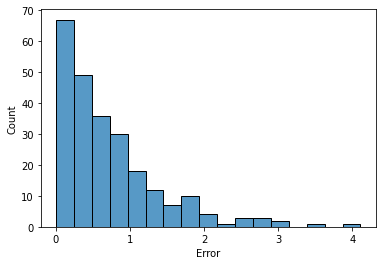

In [16]:
# Error Visualization
sns.histplot(data=df, x = "Error")
plt.show()

Conclusion : From the histogram, error did not normally distributed, it's better if error normally distributed